In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Метод главных компонент 

(Principal component analisys – PCA)

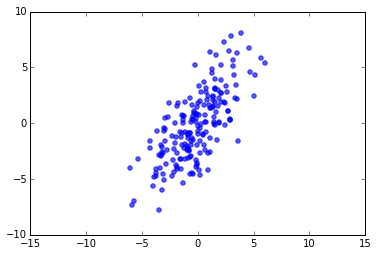

In [2]:
np.random.seed(0)
N = 200
X_init = np.random.randn(N, 2)
A = np.array([[2, -1], [3, 1]])
X = np.dot(X_init, A.T)
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.65)
plt.axis('equal')
pass

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
print "Главные компоненты (по строкам):"
print(pca.components_)
print "Дисперсии по главным компонентам:"
print(pca.explained_variance_)

Главные компоненты (по строкам):
[[-0.54293905 -0.8397721 ]
 [ 0.8397721  -0.54293905]]
Дисперсии по главным компонентам:
[ 12.88108587   1.83911588]


In [5]:
print "Среднеквадратические отклонения:"
print(np.sqrt(pca.explained_variance_))

Среднеквадратические отклонения:
[ 3.58902297  1.35614007]


In [255]:
np.dot(pca.components_, pca.components_.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

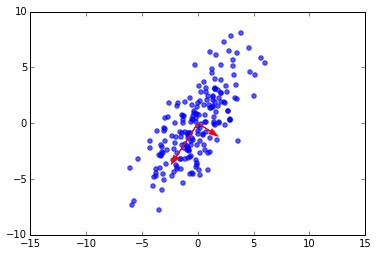

In [262]:
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.65)
v0 = np.sqrt(pca.explained_variance_[0])*pca.components_[0]
v1 = np.sqrt(pca.explained_variance_[1])*pca.components_[1]
plt.arrow(0, 0, v0[0], v0[1], color = 'r', width = .005, head_width = .5)
plt.arrow(0, 0, v1[0], v1[1], color = 'r', width = .005, head_width = .5)
plt.axis('equal');

### Как самим найти главные компоненты?

#### 1. Через собственные векторы матрицы ковариации

Вначале оценим матрицу ковариации:

In [264]:
C = np.cov(X, rowvar = 0) 
print C

[[ 5.11969737  5.05983094]
 [ 5.05983094  9.67447524]]


In [266]:
X_c = X - X.mean(axis = 0)
print np.dot(X_c.T, X_c)/(N - 1) 

[[ 5.11969737  5.05983094]
 [ 5.05983094  9.67447524]]


In [267]:
print np.dot(X.T, X)/(N - 1) 
    # Данные нужно центрировать, но для наших данных _теоретический_ центр в 0
    # Из-за этого небольшое отличие от результата функции `np.cov()`

[[ 5.14508944  5.09196281]
 [ 5.09196281  9.71513585]]


In [208]:
# Мы сами сгенерировали данные, поэтому матрица ковариации нам известна точно:
print np.dot(A, A.T)

[[ 5  5]
 [ 5 10]]


Главные компоненты – это собственные векторы матрицы ковариации (в соответствующем порядке), а дисперсии по главным компонентам – собственные числа:

In [209]:
D, Q = np.linalg.eig(C)
print D
print Q

[  1.84835767  12.94581495]
[[-0.8397721  -0.54293905]
 [ 0.54293905 -0.8397721 ]]


$$
D = Q^{-1} C Q
\quad
\Leftrightarrow
\quad
C = QDQ^{-1}
$$

$D$ – диагональная матрица, составленная из собственных чисел на диагонали (дисперсий по главным компонентам)

$Q$ – матрица, составленная из собственных векторов (главных компонент), $Q^{-1} = Q^{\rm T}$

In [270]:
# Проверка:
np.dot(Q.T, Q)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [269]:
# Проверка:
np.dot(np.dot(Q.T, C), Q)

array([[  1.84835767e+00,   2.22044605e-16],
       [  0.00000000e+00,   1.29458149e+01]])

#### 2. Через сингулярное разложение

Более профессиональный способ.
Не требует нахождения матрицы $C$ и выполнения умножения $X^{\rm T} X$.

_Сингулярное разложение_ матрицы $X$ – это

$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times N} \cdot
\underbrace{\Sigma}_{N\times d} \cdot
\underbrace{V^{\rm T}}_{d\times d}
$$

Матрицы $U$ и $V$ – ортогональные ($U^{-1} = U^{\rm T}$, $V^{-1} = V^{\rm T}$)

Матрица $\Sigma$ – диагональная с неотрицательными диагональными элементами (_сингулярными числами_), записанными в порядке убывания

В матрице $U$ по столбцам – _левые сингулярные векторы_

В матрице $V$ по столбцам – _правые сингулярные векторы_ (это и есть главные компоненты!)

Пусть $d < N$, тогда лучше использовать _неполное сингулярное разложение_:
$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times d} \cdot
\underbrace{\Sigma}_{d\times d} \cdot
\underbrace{V^{\rm T}}_{d\times d}
$$


Если $d > N$, то наоборот:
$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times N} \cdot
\underbrace{\Sigma}_{N\times N} \cdot
\underbrace{V^{\rm T}}_{N\times d}
$$

In [276]:
U, Sigma, Vt = np.linalg.svd(X, full_matrices = False)

In [277]:
#print U
print Sigma
print Vt

[ 50.88461942  19.18177104]
[[-0.5434074  -0.83946912]
 [ 0.83946912 -0.5434074 ]]


Пусть данные в $X$ центрированы, тогда
$$
C = \frac{1}{N-1} X^{\rm T} X = \frac{1}{N-1} (U \Sigma V^{\rm T})^{\rm T} (U \Sigma V^{\rm T}) = 
\frac{1}{N-1} V\Sigma^2 V^{\rm T} = V \left(\frac{1}{N-1} \Sigma^2\right) V^{\rm T}
$$

Итак, $V$ составлена из главных компонент (правых сингулярных векторов). 

С точностью до перестановки столбцов $V=Q$.

$\frac{1}{N-1} \Sigma^2$ составлена из дисперсий по главным компонентам.

С точностью до перестановки диагональных элементов $\frac{1}{N-1} \Sigma^2 = D$.

In [279]:
print Sigma**2/(N - 1)

[ 12.94622247   1.8397017 ]


### Какое количество главных компонент выбрать?

Пусть $\sigma_1^2 \ge \sigma_2^2 \ge \dots \ge \sigma_s^2 \ge \dots \ge \sigma_d^2 \ge 0$ – дисперсии по главным компонентам (собственные числа матрицы ковариации $C$).

Один из способов выбора необходимого числа $s$ главных компонент:

Объясненная дисперсия не меньше некоторого заданного уровня $\alpha$ (например, $\alpha = 0.95$):

$$
\frac{\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2}{\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2 + \dots +\sigma^2_d} \ge \alpha
$$

Заметим, что $\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2 + \dots +\sigma^2_d = {\rm tr \,C}$

In [290]:
pca_model = PCA(n_components = 0.95) # сохраняем 85% дисперсии
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(200L, 2L)
(200L, 2L)


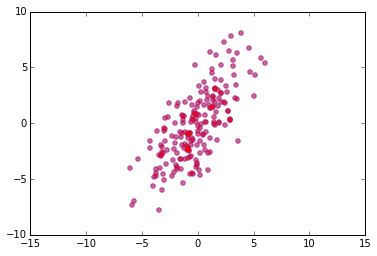

In [291]:
X_new = pca_model.inverse_transform(X_proj)
plt.scatter(X[:, 0],     X[:, 1],     alpha = 0.35, color = 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.35, color = 'r')
plt.axis('equal');

In [292]:
pca_model.explained_variance_ratio_

array([ 0.87506177,  0.12493823])

In [198]:
pca.explained_variance_[0]/(np.sum(pca.explained_variance_))

0.87506177490196368

In [226]:
pca_model.explained_variance_[0]/(np.sum(np.diag(C)))

0.87068646602745392

###Whiten – «отбеливание», декорреляция

In [296]:
pca = PCA(n_components = 2, whiten = True)
pca.fit(X)
print "Главные компоненты (по строкам):"
print(pca.components_)
print "Дисперсии по главным компонентам:"
print(pca.explained_variance_)

Главные компоненты (по строкам):
[[-0.15127768 -0.23398349]
 [ 0.619237   -0.40035618]]
Дисперсии по главным компонентам:
[ 12.88108587   1.83911588]


In [298]:
np.dot(pca.components_, pca.components_.T)

array([[  7.76332065e-02,  -1.38777878e-17],
       [ -1.38777878e-17,   5.43739528e-01]])

In [299]:
X_proj = pca.transform(X)

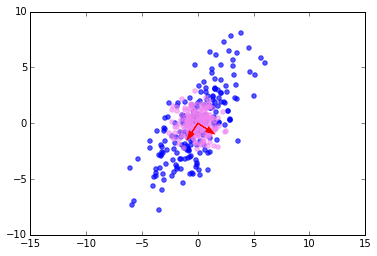

In [300]:
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.65)
plt.scatter(X_proj[:, 0], X_proj[:, 1], color = 'violet', alpha = 0.55)
v0 = np.sqrt(pca.explained_variance_[0])*pca.components_[0]
v1 = np.sqrt(pca.explained_variance_[1])*pca.components_[1]
plt.arrow(0, 0, v0[0], v0[1], color = 'r', width = .005, head_width = .5)
plt.arrow(0, 0, v1[0], v1[1], color = 'r', width = .005, head_width = .5)
plt.axis('equal');